In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# generate two class dataset
# for binary-classification dummy task
X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=27)

# split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

In [2]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# 2 models used to test which
# will yield better results

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
# for each class, what is the probability of
# a sample being classfied into that class
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

In [3]:
print(set(y_test))

{0, 1}


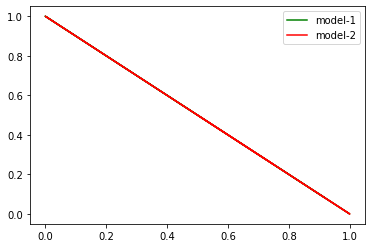

In [4]:
import matplotlib.pyplot as plt

# predicted probability of model-1
plt.plot(pred_prob1[:, 0], pred_prob1[:, 1], c='g', label='model-1')

# predicted probability of model-2
plt.plot(pred_prob2[:, 0], pred_prob2[:, 1], c='r', label='model-2')

plt.legend()
plt.show()

In [5]:
from sklearn.metrics import roc_curve

# roc curve for models
# fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
# fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# dont need to set pos_label if y_true is {-1,1} or {0,1}
# here, y = {0, 1}
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1])
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1])

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

print(
    "Threshold for LogReg is {}\n\
Threshold for kNN is {} \
    ".format(
        thresh1.shape,
        thresh2.shape
    )
)

Threshold for LogReg is (26,)
Threshold for kNN is (6,)     


sklearn.metric.roc_curve itself computes threshold for classification(probability threshold for lying in one class), and returns the list of *Decreasing thresholds* that it decided, w.r.t. the prediction probabilities and target-outputs given to it

In [6]:
from sklearn.metrics import roc_auc_score

# auc scores

# auc scores for class-1
auc_score1_1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2_1 = roc_auc_score(y_test, pred_prob2[:,1])

# auc scores for class-0
auc_score1_0 = roc_auc_score(y_test, pred_prob1[:,0])
auc_score2_0 = roc_auc_score(y_test, pred_prob2[:,0])

print(
    "AUC score for class-0:\n LogReg = {}\n KNN = {}".format(
        auc_score1_0,
        auc_score2_0
    )
)
print(
    "\nAUC score for class-1:\n LogReg = {}\n KNN = {}".format(
        auc_score1_1,
        auc_score2_1
    )
)

AUC score for class-0:
 LogReg = 0.02376255380200861
 KNN = 0.07662302725968435

AUC score for class-1:
 LogReg = 0.9762374461979914
 KNN = 0.9233769727403157


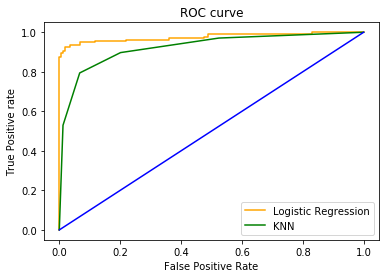

In [7]:
# plt.style.use('seaborn')

# plot roc curves
# plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
# plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
# plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.plot(fpr1, tpr1, color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, color='green', label='KNN')
plt.plot(p_fpr, p_tpr, color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC', dpi=300)
plt.show()

since the roc_curve *method* from sklearn.metrics is limited to binary classfication only, for determining auc-roc for multi-class classification problems, a one-vs-all approach is followed

Possible labels are {0, 1, 2}
All possible test labels are {0, 1, 2}


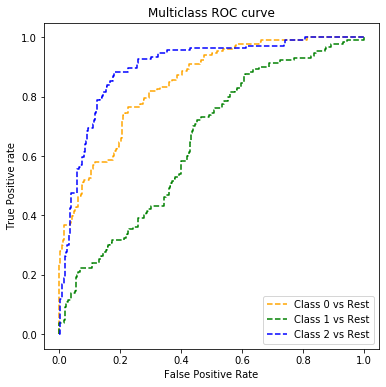

In [8]:
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate 3 class dataset(multi-class)
X, y = make_classification(n_samples=1000, n_classes=3, n_features=20, n_informative=3, random_state=42)

print("Possible labels are {}".format(set(y)))

# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# fit model
# clf = OneVsRestClassifier(LogisticRegression())
clf = LogisticRegression()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

print("All possible test labels are {}".format(set(pred)))

# roc curve for classes
fpr = {}
tpr = {}
thresh = {}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting
fig = plt.figure(figsize=(6, 6))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
fig.savefig('Multiclass ROC',dpi=300)

All possible test labels are {0, 1, 2}


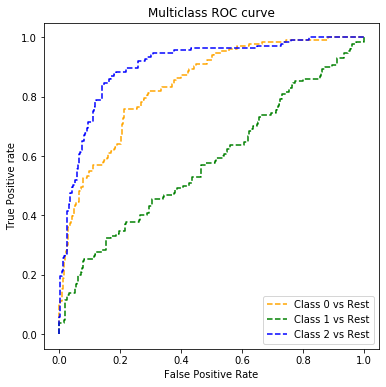

In [9]:
# fit model
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

print("All possible test labels are {}".format(set(pred)))

# roc curve for classes
fpr = {}
tpr = {}
thresh = {}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting
fig = plt.figure(figsize=(6, 6))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
fig.savefig('Multiclass ROC one vs rest',dpi=300)

In [10]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb.fit(y_test)
y_test_binarized = lb.transform(y_test)
y_pred_binarized = lb.transform(pred)

auc_model1 = roc_auc_score(y_test_binarized, y_pred_binarized, average="macro")

print(auc_model1)

0.7107538471860392


In [11]:
import tensorflow as tf
from tensorflow.keras.backend import clear_session

In [12]:
print(y_train.shape, y_test.shape)

(600,) (400,)


In [13]:
print(set(y))

{0, 1, 2}


In [14]:
clear_session()

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Flatten
from tensorflow.nn import relu, softmax

model = Sequential()
model.add(InputLayer(input_shape=X_train.shape[1:]))
print(model.output_shape)

# model.add(Flatten())
# print(model.output_shape)

model.add(Dense(32, activation=relu))
print(model.output_shape)

model.add(Dense(16, activation=relu))
print(model.output_shape)

model.add(Dense(3, activation=softmax))
print(model.output_shape)

(None, 20)
(None, 32)
(None, 16)
(None, 3)


In [15]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [16]:
history = model.fit(X_train, y_train, batch_size=16, validation_split=0.1, epochs=5)

Epoch 1/5
34/34 [==============================] - 1s 17ms/step - loss: 1.1119 - accuracy: 0.4093 - val_loss: 1.0084 - val_accuracy: 0.4667
Epoch 2/5
34/34 [==============================] - 0s 5ms/step - loss: 0.9715 - accuracy: 0.5463 - val_loss: 0.9200 - val_accuracy: 0.4833
Epoch 3/5
34/34 [==============================] - 0s 8ms/step - loss: 0.8769 - accuracy: 0.6278 - val_loss: 0.8656 - val_accuracy: 0.5333
Epoch 4/5
34/34 [==============================] - 0s 7ms/step - loss: 0.8012 - accuracy: 0.6704 - val_loss: 0.8355 - val_accuracy: 0.6333
Epoch 5/5
34/34 [==============================] - 0s 12ms/step - loss: 0.7392 - accuracy: 0.7204 - val_loss: 0.8191 - val_accuracy: 0.6000


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                672       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 51        
Total params: 1,251
Trainable params: 1,251
Non-trainable params: 0
_________________________________________________________________


In [18]:
print(history.history)

{'loss': [1.1119272708892822, 0.9715415835380554, 0.8769105672836304, 0.8011835217475891, 0.7392055988311768], 'accuracy': [0.40925925970077515, 0.5462962985038757, 0.6277777552604675, 0.6703703999519348, 0.720370352268219], 'val_loss': [1.0084446668624878, 0.9200270771980286, 0.865622878074646, 0.8354946374893188, 0.8190600275993347], 'val_accuracy': [0.46666666865348816, 0.4833333194255829, 0.5333333611488342, 0.6333333253860474, 0.6000000238418579]}


In [19]:
c = model.predict(X_test)

In [20]:
print(c.shape)

(400, 3)


In [21]:
import numpy as np

l = list(c)
print(l[0])

[0.26138732 0.35928658 0.37932622]


In [22]:
y_pred = list(map(lambda x: np.argmax(x), l))
print(y_pred)

[2, 0, 0, 0, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2, 0, 1, 1, 1, 0, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 1, 1, 2, 2, 1, 1, 2, 2, 0, 1, 1, 1, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 0, 2, 1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 2, 2, 2, 1, 1, 0, 2, 1, 1, 2, 1, 2, 2, 0, 2, 2, 2, 0, 1, 2, 1, 2, 0, 0, 1, 0, 1, 0, 2, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 1, 0, 0, 0, 2, 2, 1, 2, 1, 0, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 1, 0, 2, 0, 0, 2, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 2, 2, 0, 2, 2, 2, 1, 0, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0, 2, 1, 2, 2, 1, 1, 0, 1, 2, 0, 2, 2, 2, 2, 1, 0, 1, 2, 2, 2, 1, 1, 2, 2, 0, 0, 2, 1, 2, 0, 0, 1, 2, 1, 1, 0, 1, 0, 1, 0, 2, 2, 2, 2, 0, 1, 1, 0, 0, 

In [23]:
print(len(y_pred), y_test.shape)

400 (400,)


In [24]:
print(y_test)

[1 0 1 0 2 0 2 1 1 0 0 1 1 2 2 0 1 0 2 1 0 2 1 2 1 1 0 1 0 2 1 0 2 0 0 0 2
 0 2 1 2 0 0 1 0 1 0 1 1 2 0 0 1 0 1 0 0 1 0 1 0 2 0 2 2 1 2 0 2 1 0 2 1 0
 1 1 2 2 1 1 1 2 2 2 1 0 1 0 2 0 2 2 1 2 2 0 1 1 2 1 1 1 0 0 2 2 1 2 1 2 2
 2 1 0 2 2 0 2 1 1 2 1 0 1 1 0 1 2 1 2 0 0 2 2 0 1 1 2 1 1 2 2 2 2 0 2 2 2
 0 1 1 0 2 0 0 1 0 1 0 2 2 1 2 2 2 1 0 0 2 1 0 0 0 0 2 2 1 1 1 0 2 1 2 2 0
 1 1 2 2 0 0 0 0 2 2 0 1 1 2 2 1 0 1 2 2 1 1 2 1 2 0 0 2 2 1 1 2 0 1 2 2 0
 2 2 0 0 1 2 0 2 2 1 0 2 0 0 2 1 0 0 1 1 2 0 1 0 1 1 2 2 1 1 2 2 1 0 2 0 2
 2 2 0 2 0 1 2 0 0 0 0 1 0 1 0 0 0 2 2 0 0 1 0 0 1 1 2 1 2 1 0 0 1 2 0 2 0
 2 2 1 0 2 1 2 1 1 1 2 2 0 0 2 1 1 0 0 1 1 1 1 0 1 0 2 0 0 2 2 2 0 2 1 1 1
 1 2 0 0 2 1 0 2 1 0 1 2 1 1 0 2 0 2 1 0 2 0 0 1 2 2 0 1 1 0 2 2 1 1 1 2 2
 1 0 2 0 0 0 2 2 1 2 1 0 1 2 2 2 0 1 0 0 0 0 0 0 1 0 1 2 0 2]


All possible test labels are {0, 1, 2}


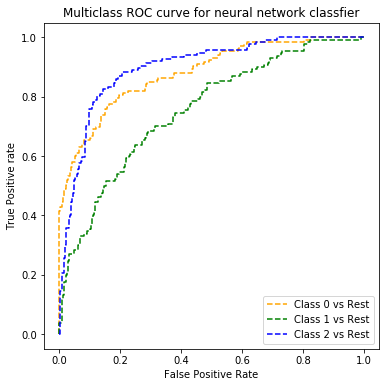

In [25]:
print("All possible test labels are {}".format(set(pred)))

# roc curve for classes
fpr = {}
tpr = {}
thresh = {}

n_class = len(set(y_pred))

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, c[:, i], pos_label=i)
    
# plotting
fig = plt.figure(figsize=(6, 6))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve for neural network classfier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
fig.savefig('Multiclass ROC NN',dpi=300)

In [26]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb.fit(y_test)
y_test_nn = lb.transform(y_test)
y_pred_nn = lb.transform(pred)

auc_model1 = roc_auc_score(y_test_nn, y_pred_nn, average="macro")

print(auc_model1)

0.7107538471860392
